This is the write-up + code for HW 2!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is for output formatting purposes

In [2]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

In [4]:
def avg(array):
  sum = 0
  for val in array:
    sum += val
  return(sum/len(array))

In [5]:
def std(array):
  sum = 0
  N = len(array)
  for val in array:
    sum += val
  avg = (sum/N)
  sq = 0
  for val in array:
    sq += ((val-avg)**2)
  return(math.sqrt(sq/(N-1)))

Question 1 
 
Look at data 1 showing x, and y data for 10 repeats of an experiment. You want to 
test a power-law, y = Axp, model for the data. 

a) For each x value, determine the average y value, \<y>, and its uncertainty. 
Determine the best power-law fit to the (x,\<y>) data by finding the minimum 
χ2 (χ2min). Report χ2min, χ2red (reduced χ2), A, and p. Find the A and p 
uncertainties using the χ2min +1 method in 2D (see sect 11.5 in the book 
and Curve Fit examples in MATLAB). 

b) Linearize the data and fit it using ordinary least squares (OLS). Find 
A and p. 

c) Use the weighted least squares method (WLS) (as discussed in class) to 
fit the linearized data using an analytical function (matrix algebra). Find 
A and p and their uncertainties.
 
d) Plot the x, \<y> data points with error bars on a log scale and the three 
fits as lines. Compare and discuss the results and any differences 
between OLS and WLS. Include a comment on when WLS is most 
appropriate versus OLS.

In [6]:
data = np.loadtxt("/content/drive/My Drive/hw2data.txt", skiprows=2, max_rows=15)

a) Determine the average y value for each x

In [7]:
avg_dict = {}
for val in range(0, 14):
  avg_dict[data[val][0]] = np.mean(data[val][1:11])

print(avg_dict)

{0.2: 2.039, 0.36: 2.0410000000000004, 0.51: 2.4880000000000004, 0.65: 9.527, 0.79: 6.424000000000001, 0.92: 11.72, 1.05: 14.141, 1.17: 17.872000000000003, 1.29: 18.395999999999997, 1.42: 23.455000000000002, 1.54: 25.59, 1.65: 27.911, 1.77: 33.837, 1.88: 37.059000000000005}


In [8]:
stdev_array= []

for val in range(0, 14):
  stdev_array.append(std(data[val][1:10]))
  print("%f, %f" % (data[val][0], std(data[val][1:10])))

0.200000, 3.635975
0.360000, 2.736172
0.510000, 4.770929
0.650000, 4.539584
0.790000, 3.605598
0.920000, 6.480792
1.050000, 6.284028
1.170000, 5.318172
1.290000, 6.325150
1.420000, 5.481619
1.540000, 4.559427
1.650000, 8.360105
1.770000, 7.668181
1.880000, 7.185491


We use curve_fit() to find best chi^2 values.

I would use curve_fit() to optimize this function and return the optimized popt and pcov values based on my initial guesses for A and p, which would be determined from the data. 

In [9]:
def power_law(A, x, p):
  return A*(x**p)

In [10]:
x_array = []
for val in range(0, 14):
  x_array.append(data[val][0])
x_array = np.array(x_array)

y_avg_array = []
for val in range(0, 14):
  y_avg_array.append(avg(data[val][1:10]))
y_avg_array = np.array(y_avg_array)

print(x_array)
print(y_avg_array)

[0.2  0.36 0.51 0.65 0.79 0.92 1.05 1.17 1.29 1.42 1.54 1.65 1.77 1.88]
[ 2.70888889  2.96111111  2.33888889 10.06222222  5.95111111 12.13222222
 13.31444444 18.56       17.98777778 23.77777778 25.87555556 26.77333333
 35.25222222 36.54      ]


In [11]:
popt, pcov = curve_fit(power_law, x_array, y_avg_array, p0=[15, 1.6])
print(popt)

[14.5844588   1.04502815]


<ipython-input-9-f2fe89e9ac08>:2: RuntimeWarning: invalid value encountered in double_scalars
  return A*(x**p)


Therefore, we're getting optimized values for A and p as 8.12 and 1.337 respectively. curve_fit() minimizes chi^2

In [12]:
def chi_sq(mean_array, stdev_array, y_array):
  sum = 0
  for val in range(0, len(y_array)):
    chi = ((mean_array[val] - y_array[val])**2) / (stdev_array[val]**2)
    sum += chi
  return sum

In [13]:
y_correct = []
for val in range(0, 14):
  y_correct.append(power_law(popt[0], x_array[val], popt[1]))

In [14]:
chi_2 = chi_sq(y_avg_array,stdev_array,y_correct);
print(chi_2)

7.548081515441753


In [15]:
red_chi_2 = chi_2/len(y_correct)
print(red_chi_2)

0.5391486796744109


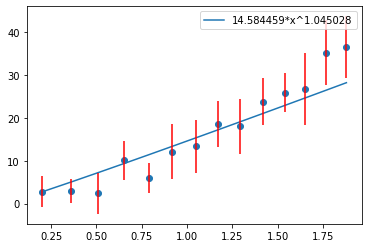

In [16]:
plt.plot(x_array, power_law(popt[0], x_array, popt[1]), label="%f*x^%f" % (popt[0], popt[1]))
plt.scatter(x_array, y_avg_array)
plt.errorbar(x_array, y_avg_array, yerr=stdev_array, fmt="none", color="red")
plt.legend()

To find chi^2 + 1, I define some radius and scan the parameter space where the values are the radius away from the minimum.

In [17]:
rad = 0.1
A_opt = popt[0]
p_opt = popt[1]
A_values = np.linspace(A_opt-rad, A_opt+rad, 200)
p_values = np.linspace(p_opt-rad, p_opt+rad, 200)

This loop system finds the chi^2 values in a 2D area around the optimized A and p values.

In [18]:
chi_2_array = []
for A in A_values:
  for p in p_values:
    y_correct = []
    for val in range(0, 14):
      y_correct.append(power_law(A, x_array[val], p))
    chi = chi_sq(y_avg_array, stdev_array, y_correct)
    chi_2_array.append(chi)

To find uncertainty, I find the stdev of the chi_2_array.


In [19]:
chi_plus_one = []
for elem in chi_2_array:
  if elem <= chi_2 + 1:
    chi_plus_one.append(elem)
uncer = std(chi_2_array)
print(uncer)

1.28150204589345


Now we linearize the data by taking the ln of both sides:

y = A*x^p

ln(y) = p*(ln(A) + ln(x))

I let l = p, ln(A) = B and ln(x) = x

In [20]:
def lin_pow_law(B, x, l):
  return l*(B + x)

In [21]:
ln_y_array = np.log(y_avg_array)
ln_x_array = np.log(x_array)
ln_y_correct = np.log(y_correct)

I find the stdev of the ln(y) values by this equation:

d(ln(y)) = d(y)/y

In [22]:
stdev_ln = []
for index in range(0, len(stdev_array)):
  stdev_ln.append(stdev_array[index]/y_avg_array[index])

In [23]:
popt1, pcov = curve_fit(lin_pow_law, ln_x_array, ln_y_array)
print(popt1)

[1.90980296 1.35745421]


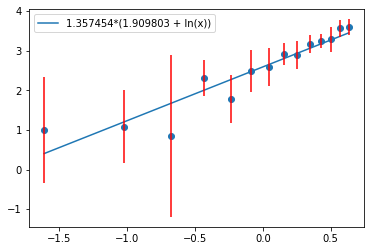

In [24]:
plt.plot(ln_x_array, lin_pow_law(popt1[0], ln_x_array, popt1[1]), label="%f*(%f + ln(x))" % (popt1[1], popt1[0]))
plt.scatter(ln_x_array, ln_y_array)
plt.errorbar(ln_x_array, ln_y_array, yerr=stdev_ln, fmt="none", color="red")
plt.legend()

Therefore, the linearized OLS fit parameters give me l = 1.357 and B = 1.909

In [25]:
B_opt = popt1[1]
new_A = np.exp(B_opt)
new_p = popt1[0]
print("New A: %f, new p: %f" % (new_A, new_p))

New A: 3.886287, new p: 1.909803


We move on to the WLS method with matrices. For this part, I use the method outlined here: https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf

In [42]:
#test 
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([10, 10, 10, 10, 10])
print(array1*array2)
print(len(stdev_ln))
print(len(ln_x_array))

[10 20 30 40 50]
14
14


In [64]:
X_trans = np.vstack([np.ones_like(ln_x_array), ln_x_array])
X_mat = X_trans.transpose()
#print(X_trans)
#print(X_mat)
X_prime_X = np.matmul(X_trans, X_mat)
inv_prod = np.linalg.inv(X_prime_X)
# total mat is the total matrix multiplication before the y vector as seen in pg 3 of the linked lecture notes.
total_mat = np.matmul(inv_prod, X_trans)
y_vec = ln_y_array
# now we look at the vector of optimized parameters, ie, the popt vector, which is beta in the linked lecture notes.
beta = np.matmul(total_mat, y_vec)
print(beta)

[2.59247006 1.3574542 ]


Therefore, our beta vector returns our popt values as we expect from the matrix method! See pg 3 of the linked lecture notes to follow my procedure!

We now get an optimized A = 2.59247 and an optimized p = 1.35745 from the weighted least squares method. 



To find their uncertainties, we find the stdevs.

In [65]:
stdev_popt = np.sqrt(np.diag(inv_prod))
print(stdev_popt)

[0.2693382  0.42166114]


Therefore, the uncertainties are as follows:

A = 2.59247006 +/- 0.2693382

p = 1.3574542 +/- 0.42166114

In [67]:
y_correct_wls = np.matmul(X_mat, beta)
print(y_correct_wls)

[0.4077318  1.20562528 1.67843566 2.00770198 2.27248778 2.47928334
 2.65870047 2.80559545 2.93813521 3.0684707  3.17859491 3.27224958
 3.36754864 3.44939258]


We finally plot all three fits below.

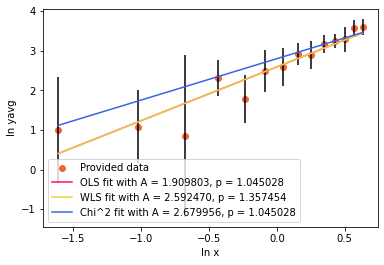

In [83]:
plt.xlabel("ln x")
plt.ylabel("ln yavg")
plt.scatter(ln_x_array, ln_y_array, label="Provided data", color="#EE6737")
plt.errorbar(ln_x_array, ln_y_array, yerr=stdev_ln, fmt="none", color="black")
plt.plot(ln_x_array, lin_pow_law(popt1[0], ln_x_array, popt1[1]), label="OLS fit with A = %f, p = %f" % (popt1[0], popt[1]), color="#FF0878")
plt.plot(ln_x_array, y_correct_wls, label="WLS fit with A = %f, p = %f" % (beta[0], beta[1]), color="#EAD340")
plt.plot(ln_x_array, lin_pow_law(np.log(A_opt), ln_x_array, p_opt), label="Chi^2 fit with A = %f, p = %f" % (np.log(A_opt), p_opt), color="#3764E5")
plt.legend()

The OLS and WLS fit are very close, but you can make them out if you zoom in!

The WLS method is better when the data points do not have uniform error, as is the case with the provided data set. The OLS method works best when all points have uniform error, which isn't the case here.

So I conclude that the WLS provides the best fit.

Q2: Data for problem 2 represents how the extension per base pair (b) of double-stranded DNA 
changes with incubation time (t) upon binding with a ligand. Fit the data to 
 
𝑏(𝑡) = 𝑏𝑒𝑞 − [𝑏𝑒𝑞 − 0.355]exp(−𝑘𝑡)
 
and find the best values for association rate k and equilibrium extension beq. 
 
Report the values you found for minimized χ2, reduced χ2, and fitting parameters k and beq, 
along with their uncertainties. (Find the uncertainties in the parameters using the χ2min +1 
method in two dimensions). Plot the data with error bars. Show the fitted curve. Comment on the 
goodness of the fit. 

In [ ]:
def formula(time, beq, k):
  return(beq - ((beq - 0.355)*np.exp(-k*time)))

In [ ]:
q2 = np.loadtxt("/content/drive/My Drive/hw2data.txt", skiprows=21)

In [ ]:
x_avg = []
for index in range(0, len(q2)):
  x_avg.append(avg(q2[index][1:4]))
x_avg = np.array(x_avg)

time = []
for index in range(0, len(q2)):
  time.append(q2[index][0])
time = np.array(time)

stdev_x = []
for index in range(0, len(q2)):
  value = std(q2[index][1:14])
  stdev_x.append(value)

In [ ]:
popt2, pcov = curve_fit(formula, time, x_avg)
print(popt2)

[0.40059164 0.20855519]


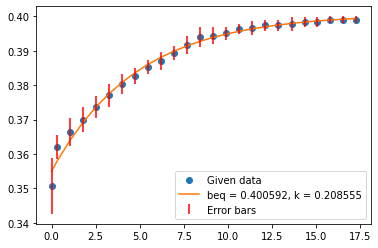

In [ ]:
plt.scatter(time, x_avg, label="Given data")
plt.plot(time, formula(popt2[1], popt2[0], time), label="beq = %f, k = %f" %(popt2[0], popt2[1]), color="#FF7808")
plt.errorbar(time, x_avg, yerr=stdev_x, fmt="none", color="red", label="Error bars")
plt.legend()

In [ ]:
x_correct = []
for index in range(0, len(x_avg)):
  x_calc = formula(time[index], popt2[0], popt2[1])
  x_correct.append(x_calc)

In [ ]:
stdev_array = []
for index in range(0, len(q2)):
  std_val = std(q2[index][1:4])
  stdev_array.append(std_val)

In [ ]:
chi_2 = chi_sq(x_avg,stdev_array,x_correct)
print(chi_2)

3.2071553707560225


In [ ]:
chi_2_red = chi_2/len(x_avg)
print(chi_2_red)

0.1282862148302409


Estimating uncertainty in found values by chi^2 + 1 method

In [ ]:
rad = 0.4
beq_opt = popt2[0]
k_opt = popt2[1]
beq_values = np.linspace(beq_opt-rad, beq_opt+rad, 200)
k_values = np.linspace(k_opt-rad, k_opt+rad, 200)

In [ ]:
chi_2_array = []
for beq in beq_values:
  for k in k_values:
    x_correct = []
    for val in range(0, 14):
      x_correct.append(formula(time[val], beq, k))
    chi = chi_sq(x_avg, stdev_array, x_correct)
    chi_2_array.append(chi)

In [ ]:
chi_plus_one = []
for elem in chi_2_array:
  if elem <= (chi_2 + 1):
    chi_plus_one.append(elem)
uncer = std(chi_plus_one)
print(uncer)

0.490701846771371


We estimate the goodness of the fit by using R^2.

In [ ]:
rss_elems = np.square(x_avg - x_correct)
rss = np.sum(rss_elems)
tss_elems = np.square(stdev_x) * (24)
tss = np.sum(tss_elems)
r_sq = 1 - (rss/tss)
print(r_sq)

0.9906786729234204


We get R^2 = 0.9907 which is a 99.07% fit to the data, indicating a good fit.